## Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

pd.set_option('display.max_columns', 200)

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#read dataset
df = pd.read_csv('cleaned_train_data.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


# Univariate Analysis :

## Numeric Column

### (1). Show Outliers with Boxplot

In [17]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
              'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
              'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 
              'Departure Delay in Minutes', 'Arrival Delay in Minutes']

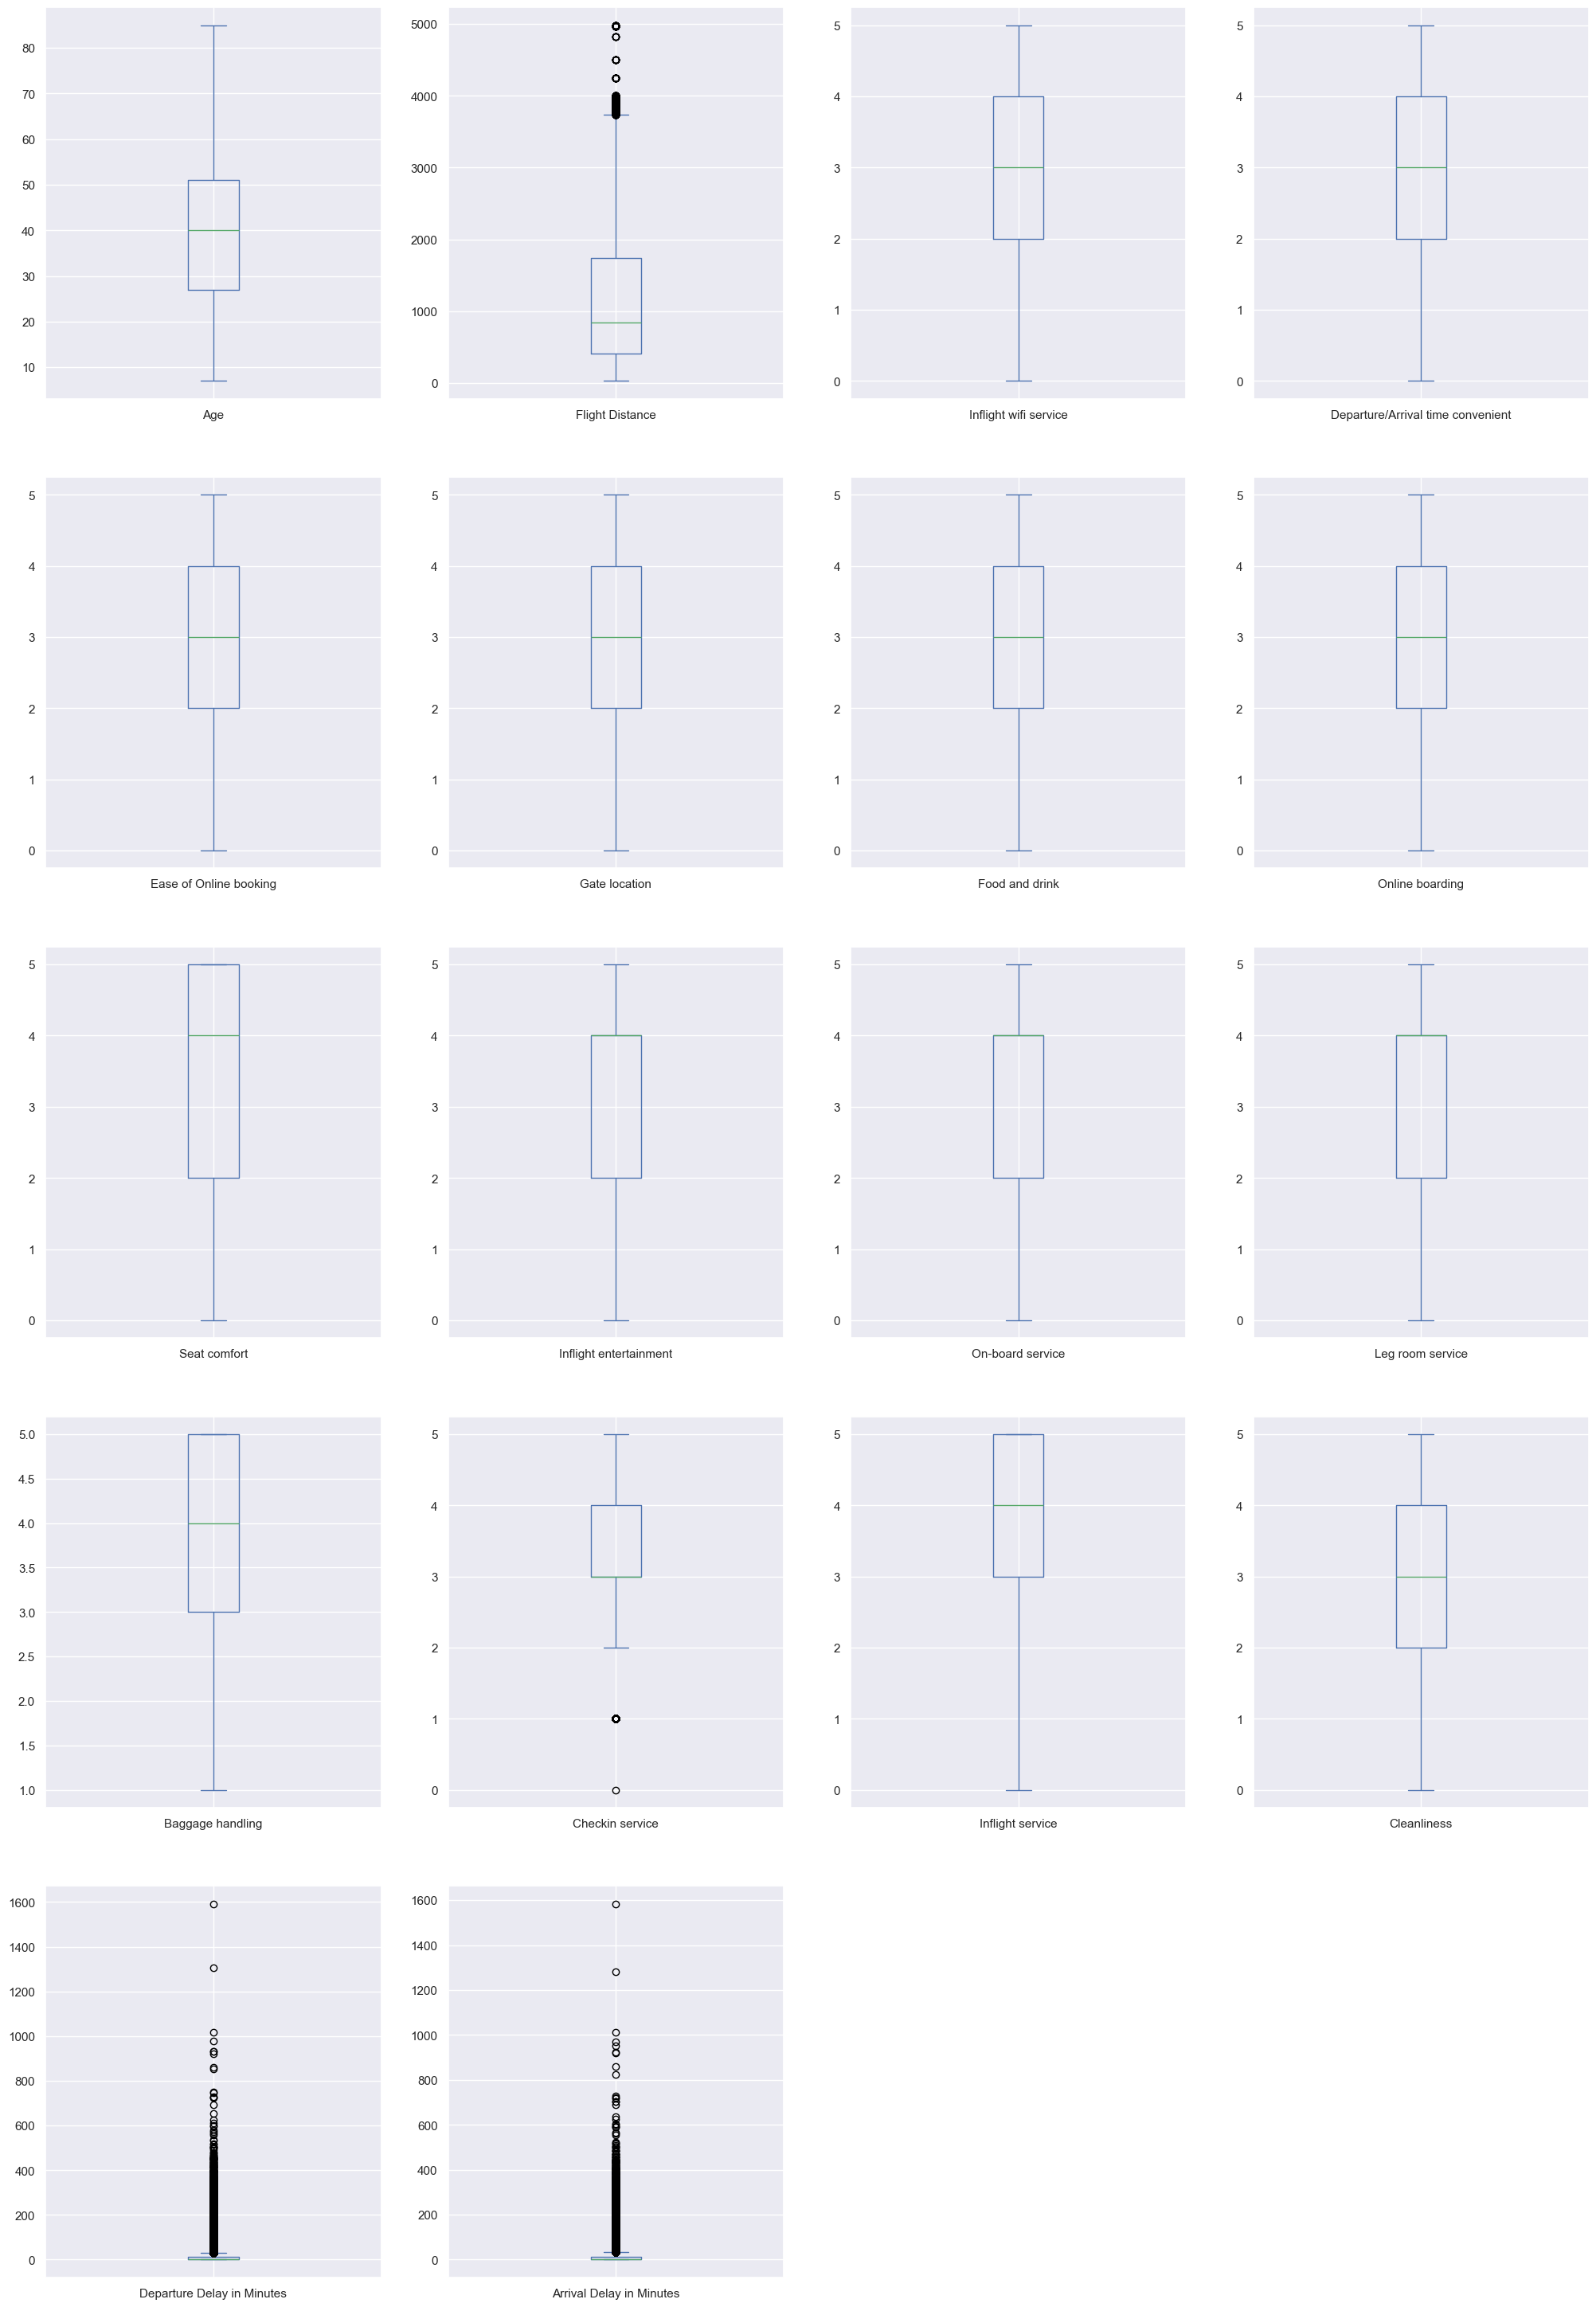

In [21]:
# Create the box plot with subplots and layout
df.plot(kind='box', subplots=True, layout=(8, 4), figsize=(25, 60))

# Display the plot
plt.show()

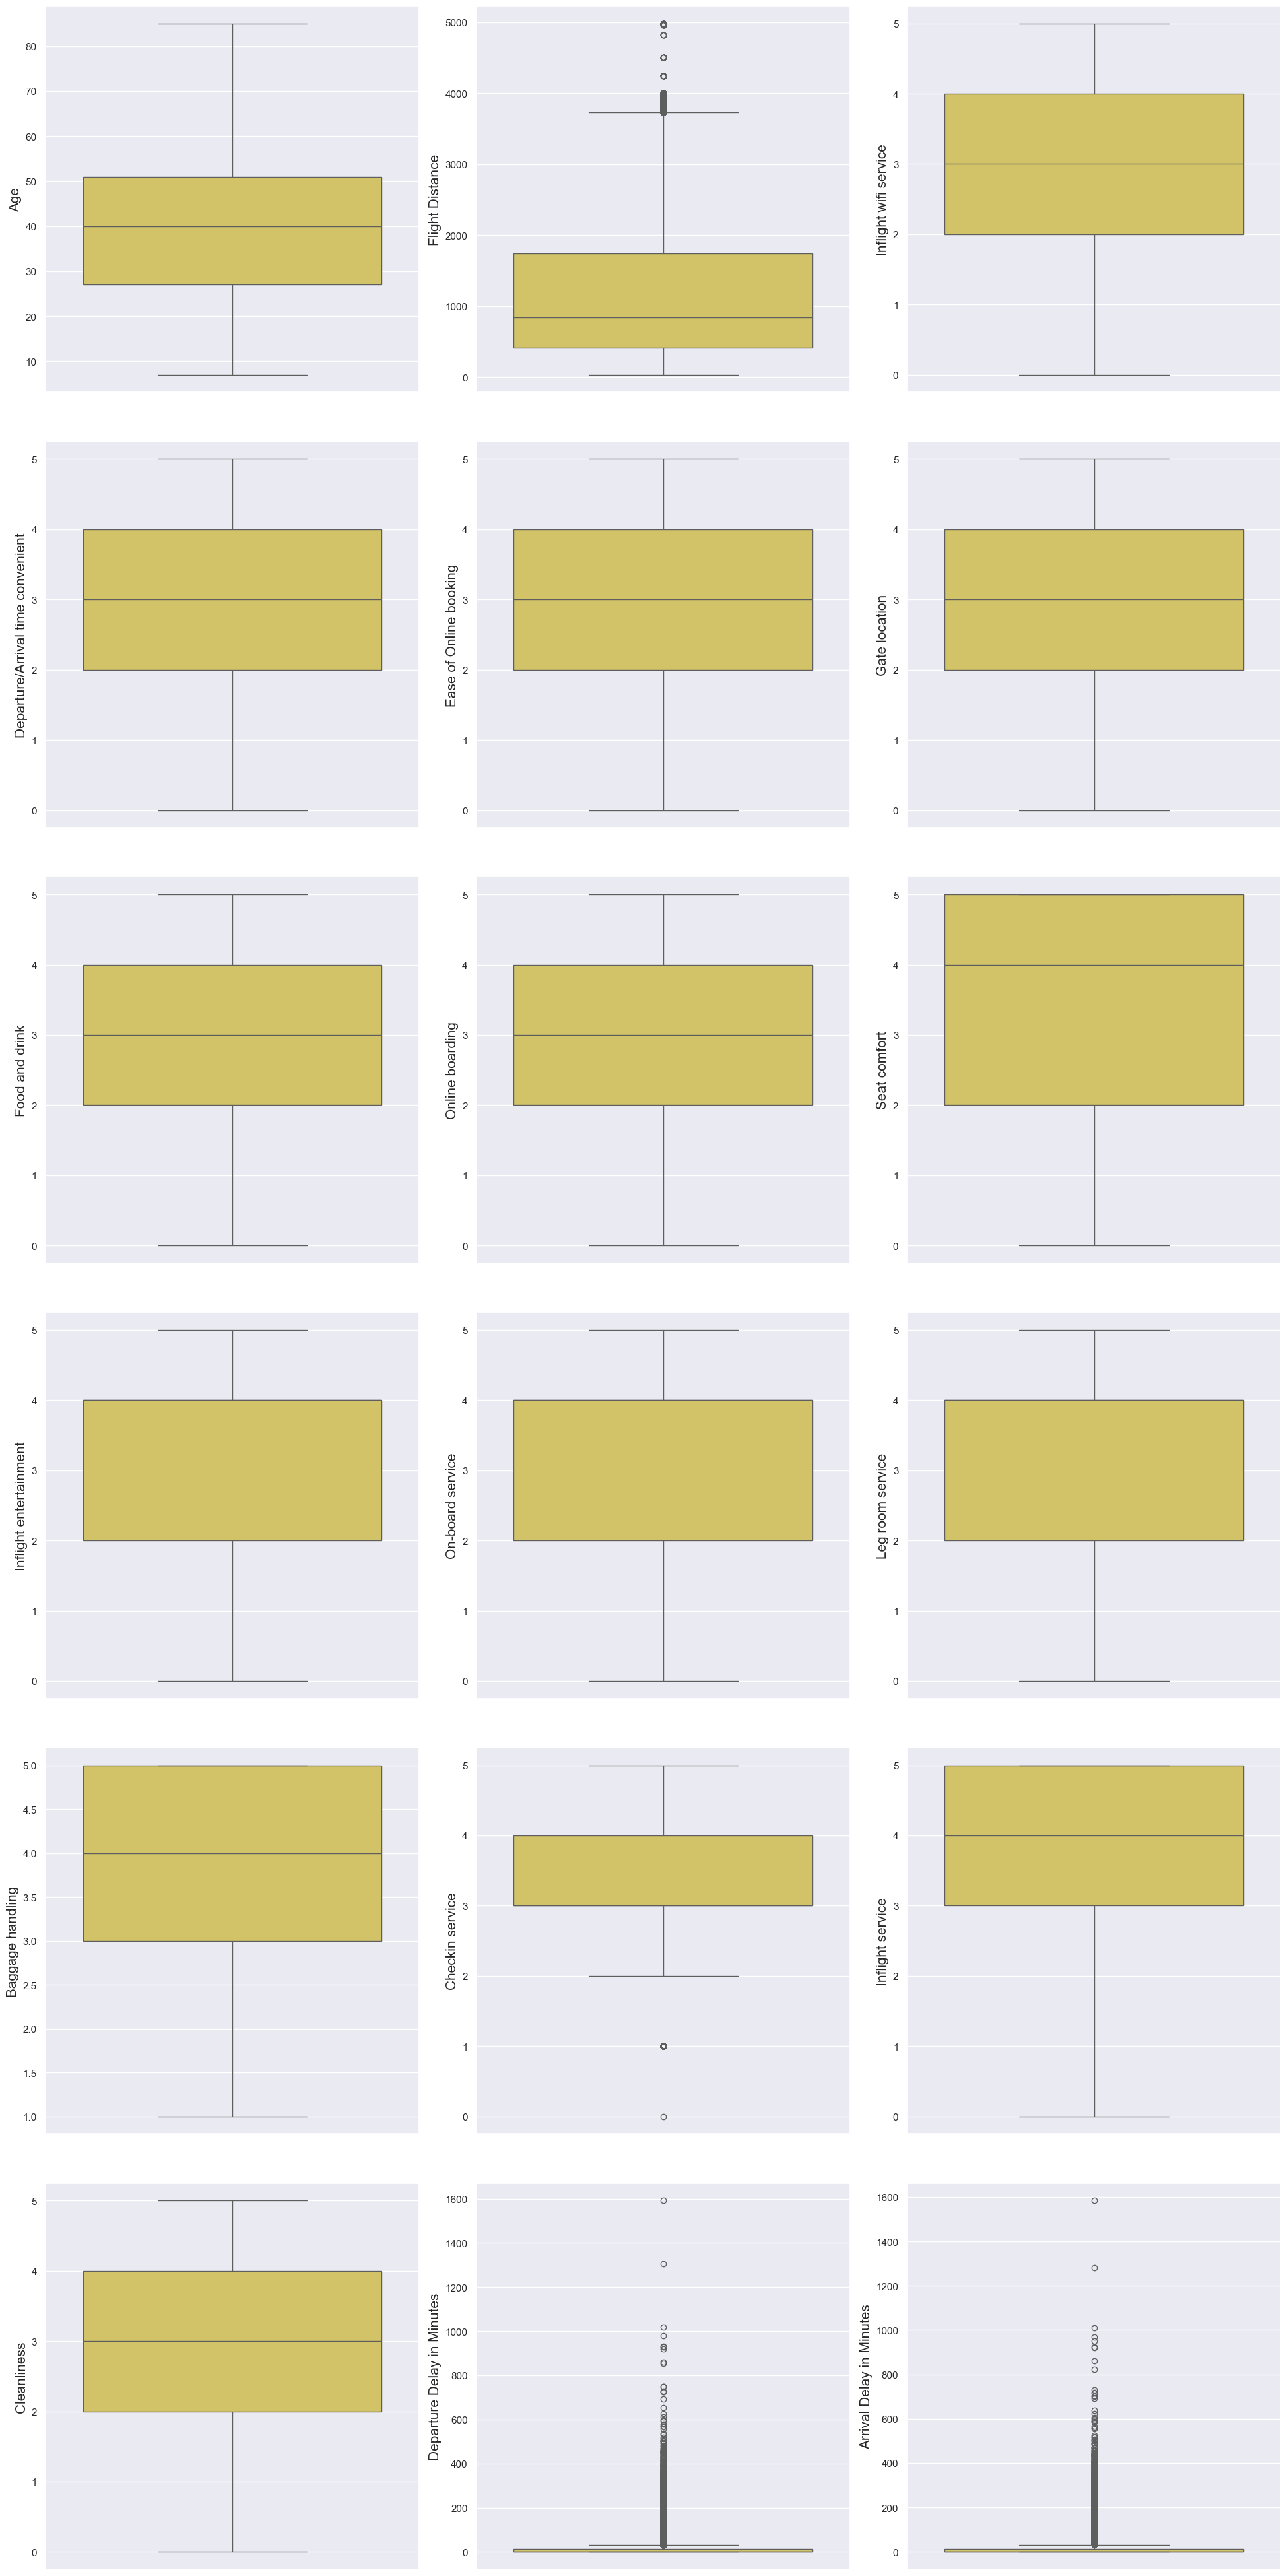

In [27]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(numerical,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df,y=df[f],color='#E3CF57')

plt.show()

In [31]:
# show the profile of outlier 1
outlier1 = df['Flight Distance'].max()

df[df['Flight Distance'] == outlier1]

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2847,Female,Loyal Customer,Personal Travel,Business,satisfied,63,4983,0,5,0,2,0,5,1,3,2,4,3,1,5,1,3,0.0
18434,Female,Loyal Customer,Business travel,Eco,satisfied,31,4983,4,3,3,3,4,4,4,3,2,5,2,4,1,4,18,0.0
19755,Female,Loyal Customer,Business travel,Business,satisfied,50,4983,5,4,5,5,5,1,5,3,2,4,3,5,5,5,0,0.0
33094,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,29,4983,2,4,2,5,2,4,4,2,2,4,4,4,3,4,6,0.0
46848,Male,Loyal Customer,Business travel,Business,satisfied,42,4983,3,3,3,3,5,4,4,4,5,4,3,4,2,4,0,0.0
64631,Female,Loyal Customer,Business travel,Business,satisfied,52,4983,3,5,5,5,3,3,3,3,3,3,5,3,2,3,16,0.0
64791,Female,Loyal Customer,Business travel,Business,satisfied,50,4983,4,4,4,4,4,4,4,2,2,4,4,4,3,4,0,0.0
67767,Male,Loyal Customer,Personal Travel,Eco Plus,satisfied,67,4983,5,5,5,4,5,1,1,1,3,5,5,1,3,1,0,0.0
74837,Female,Loyal Customer,Business travel,Business,satisfied,37,4983,2,3,2,2,4,4,4,3,1,5,1,4,3,4,0,2.0
79574,Male,Loyal Customer,Business travel,Eco Plus,satisfied,38,4983,4,4,4,4,4,4,4,3,4,3,5,4,5,4,2,0.0


In [33]:
# Show the profile of outlier 2
outlier2 = df['Departure Delay in Minutes'].max()

df[df['Departure Delay in Minutes'] == outlier2]

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
83741,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0


In [35]:
# Show the profile of outlier 3
outlier3 = df['Arrival Delay in Minutes'].max()

df[df['Arrival Delay in Minutes'] == outlier3]

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
83741,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0


In [39]:
# Show the profile of outlier 4
outlier4 = df['Checkin service'].min()

df[df['Checkin service'] == outlier4]

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
6580,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,44,214,4,5,5,5,1,4,0,4,4,3,3,0,1,0,200,233.0


In [41]:
df['Checkin service'].unique()

array([4, 1, 3, 5, 2, 0], dtype=int64)

In [43]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Exploratory Data Analysis

## Pie Chart Percentage Distribution

In [45]:
#array of non continuos values
non_continues = ['Inflight wifi service', 'Departure/Arrival time convenient',
              'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding','Seat comfort', 'Inflight entertainment','On-board service',
              'Leg room service','Baggage handling', 'Checkin service','Inflight service','Cleanliness']
len(non_continues)

14

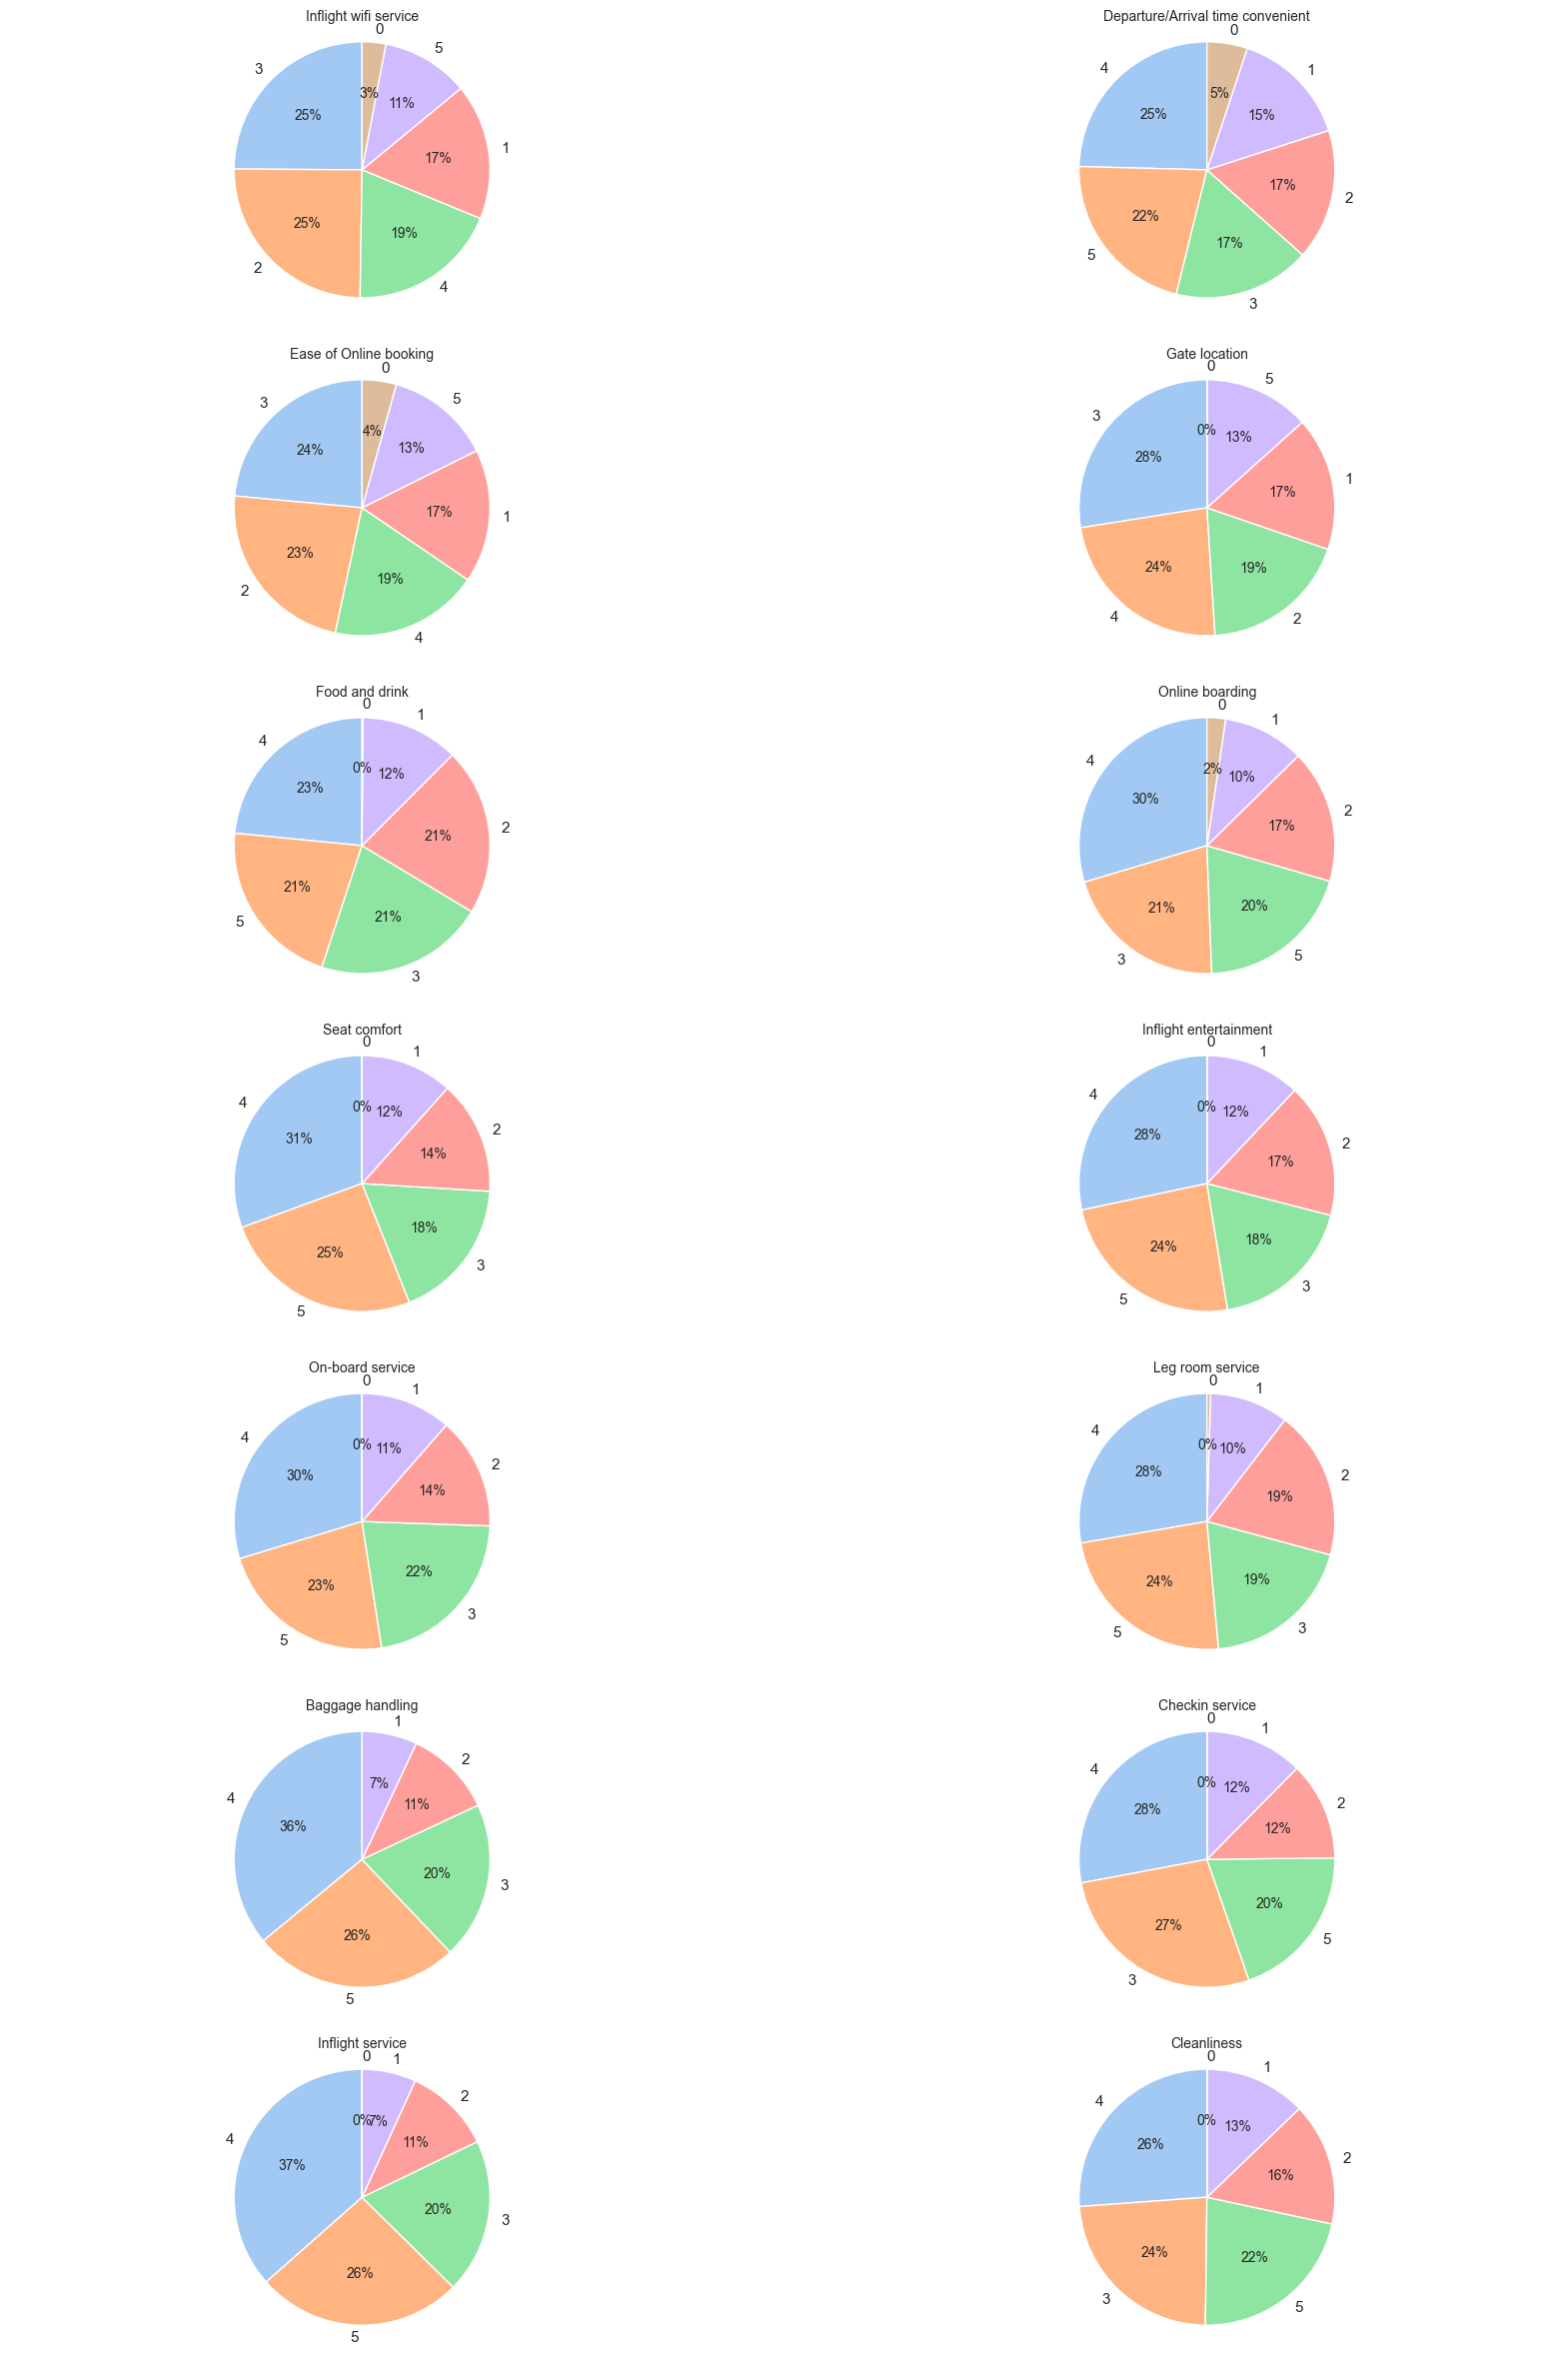

In [52]:
#displaying non continuos values in pie
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(7, 2, figsize = (20, 30))
for i, col in enumerate(non_continues):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("pastel"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

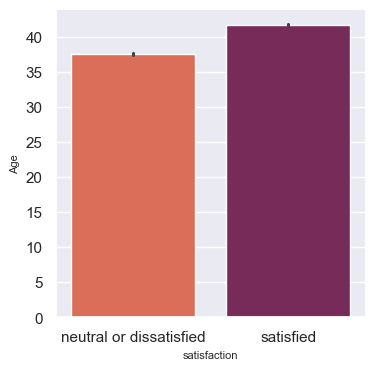

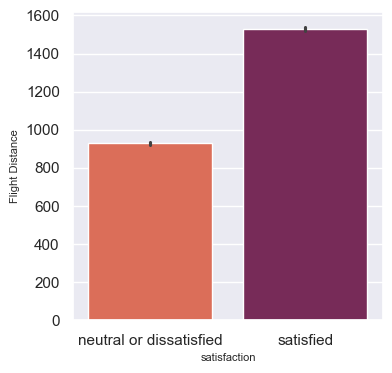

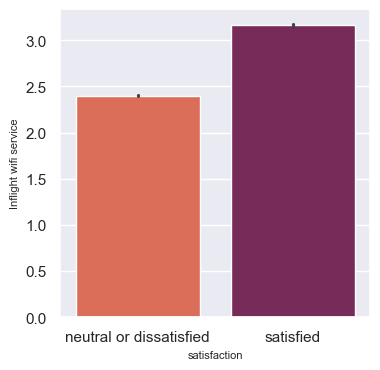

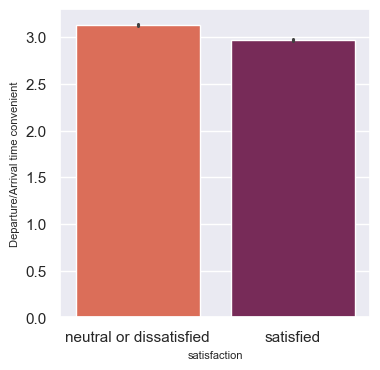

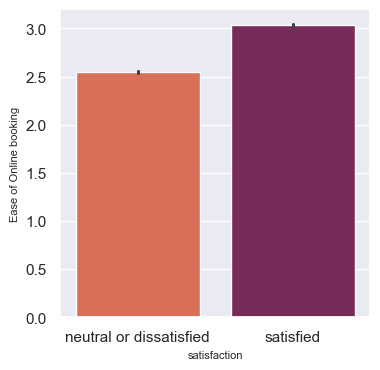

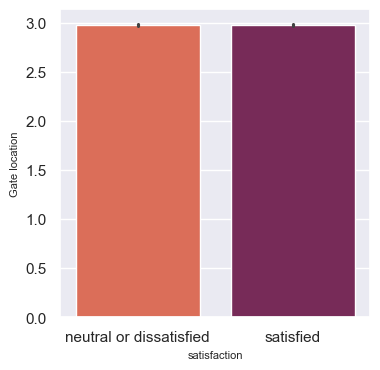

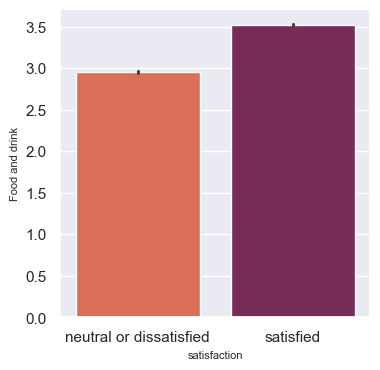

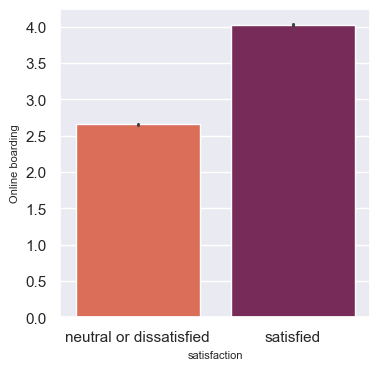

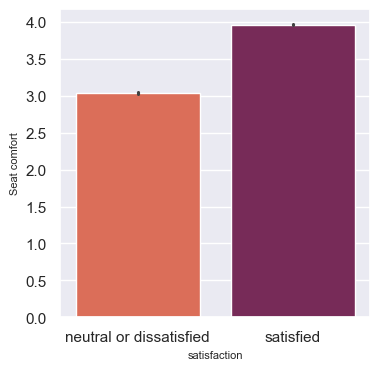

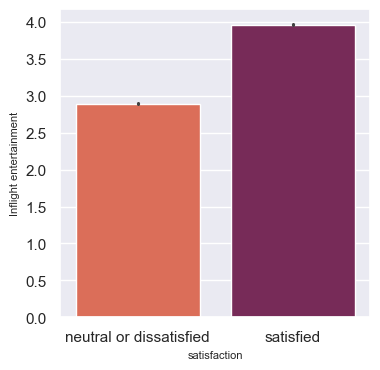

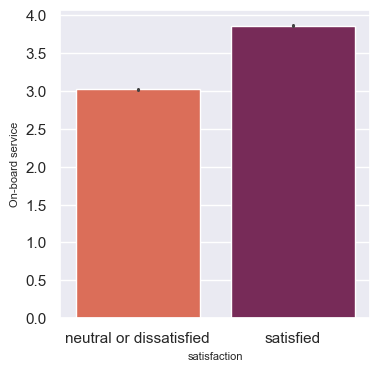

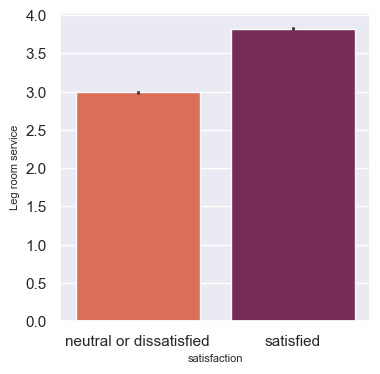

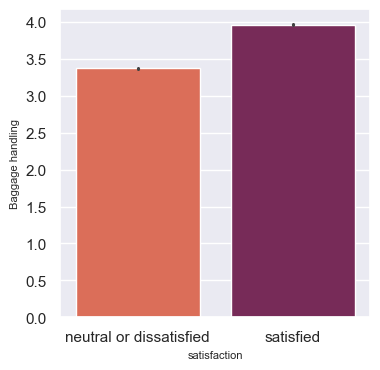

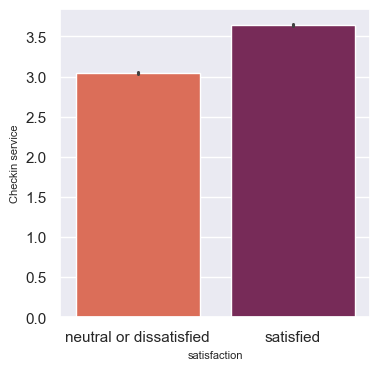

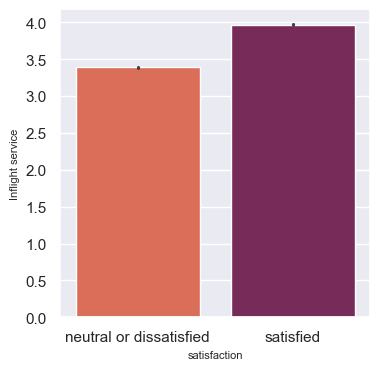

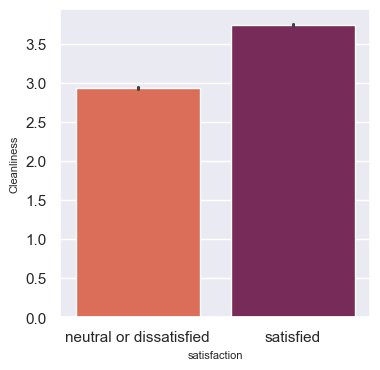

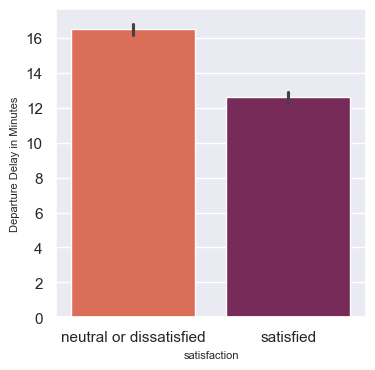

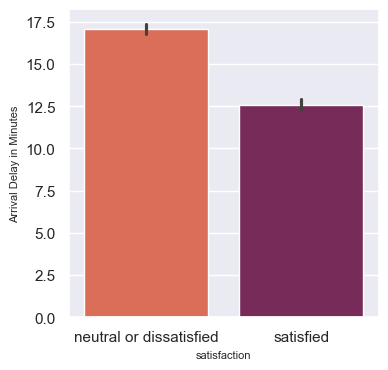

In [54]:
#plotting the barplot for numerical values
sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
for i in numerical:
    sns.barplot(data=df, x='satisfaction', y=i, palette='rocket_r')
    plt.show()

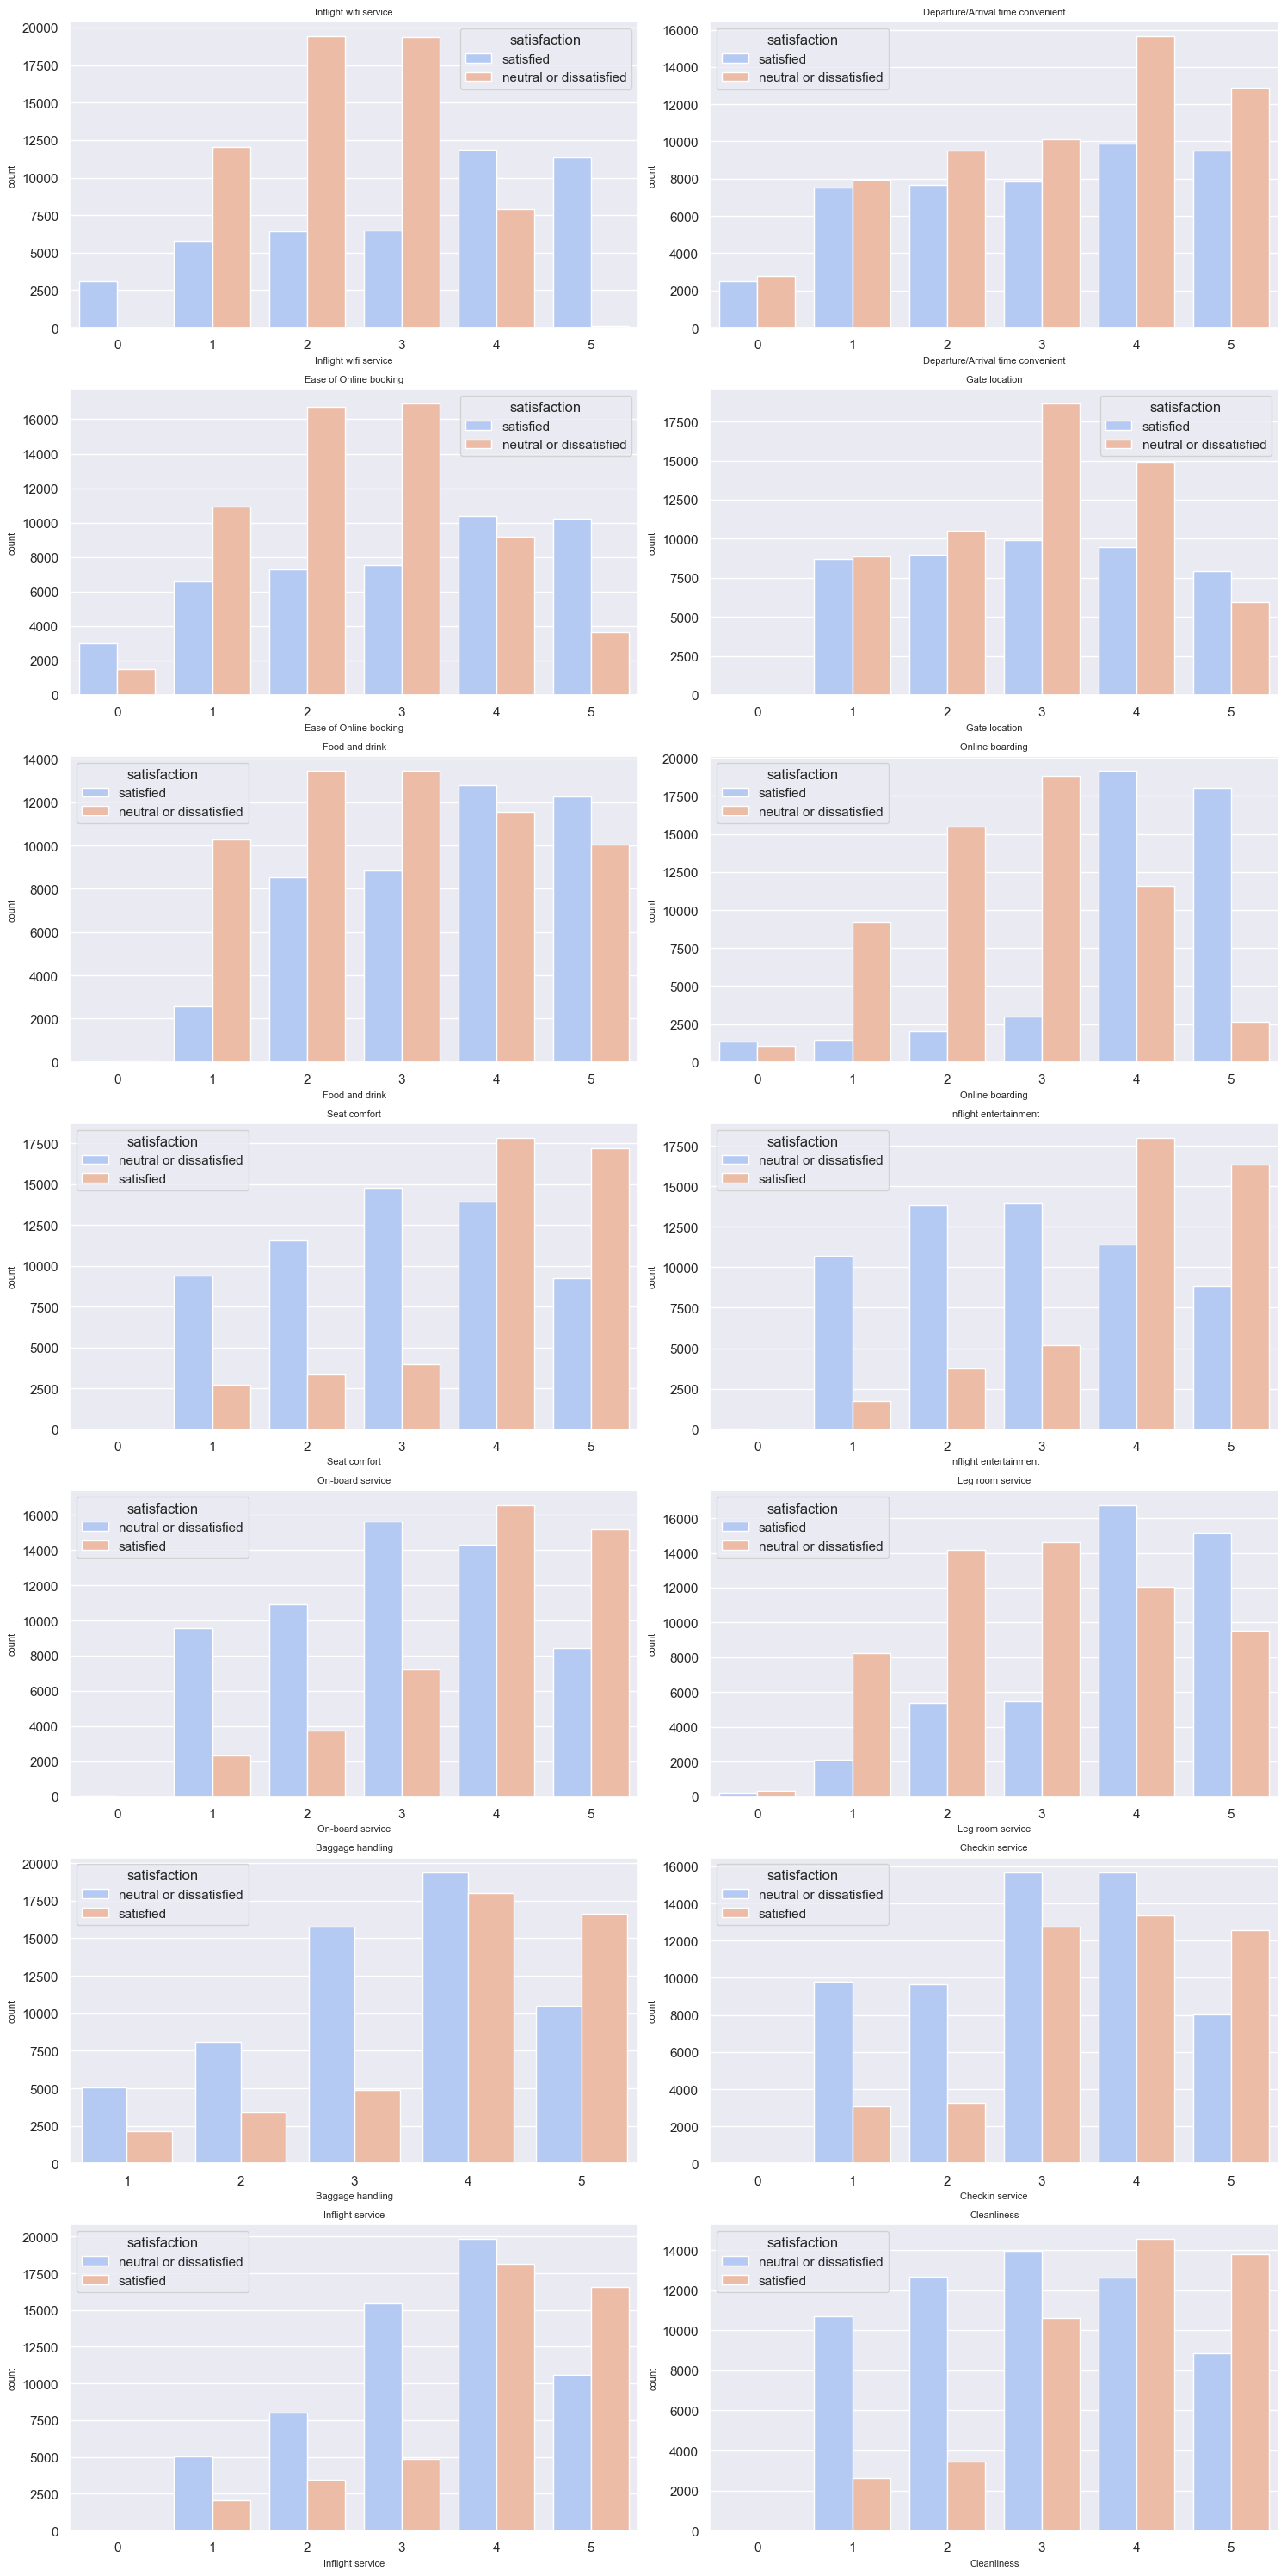

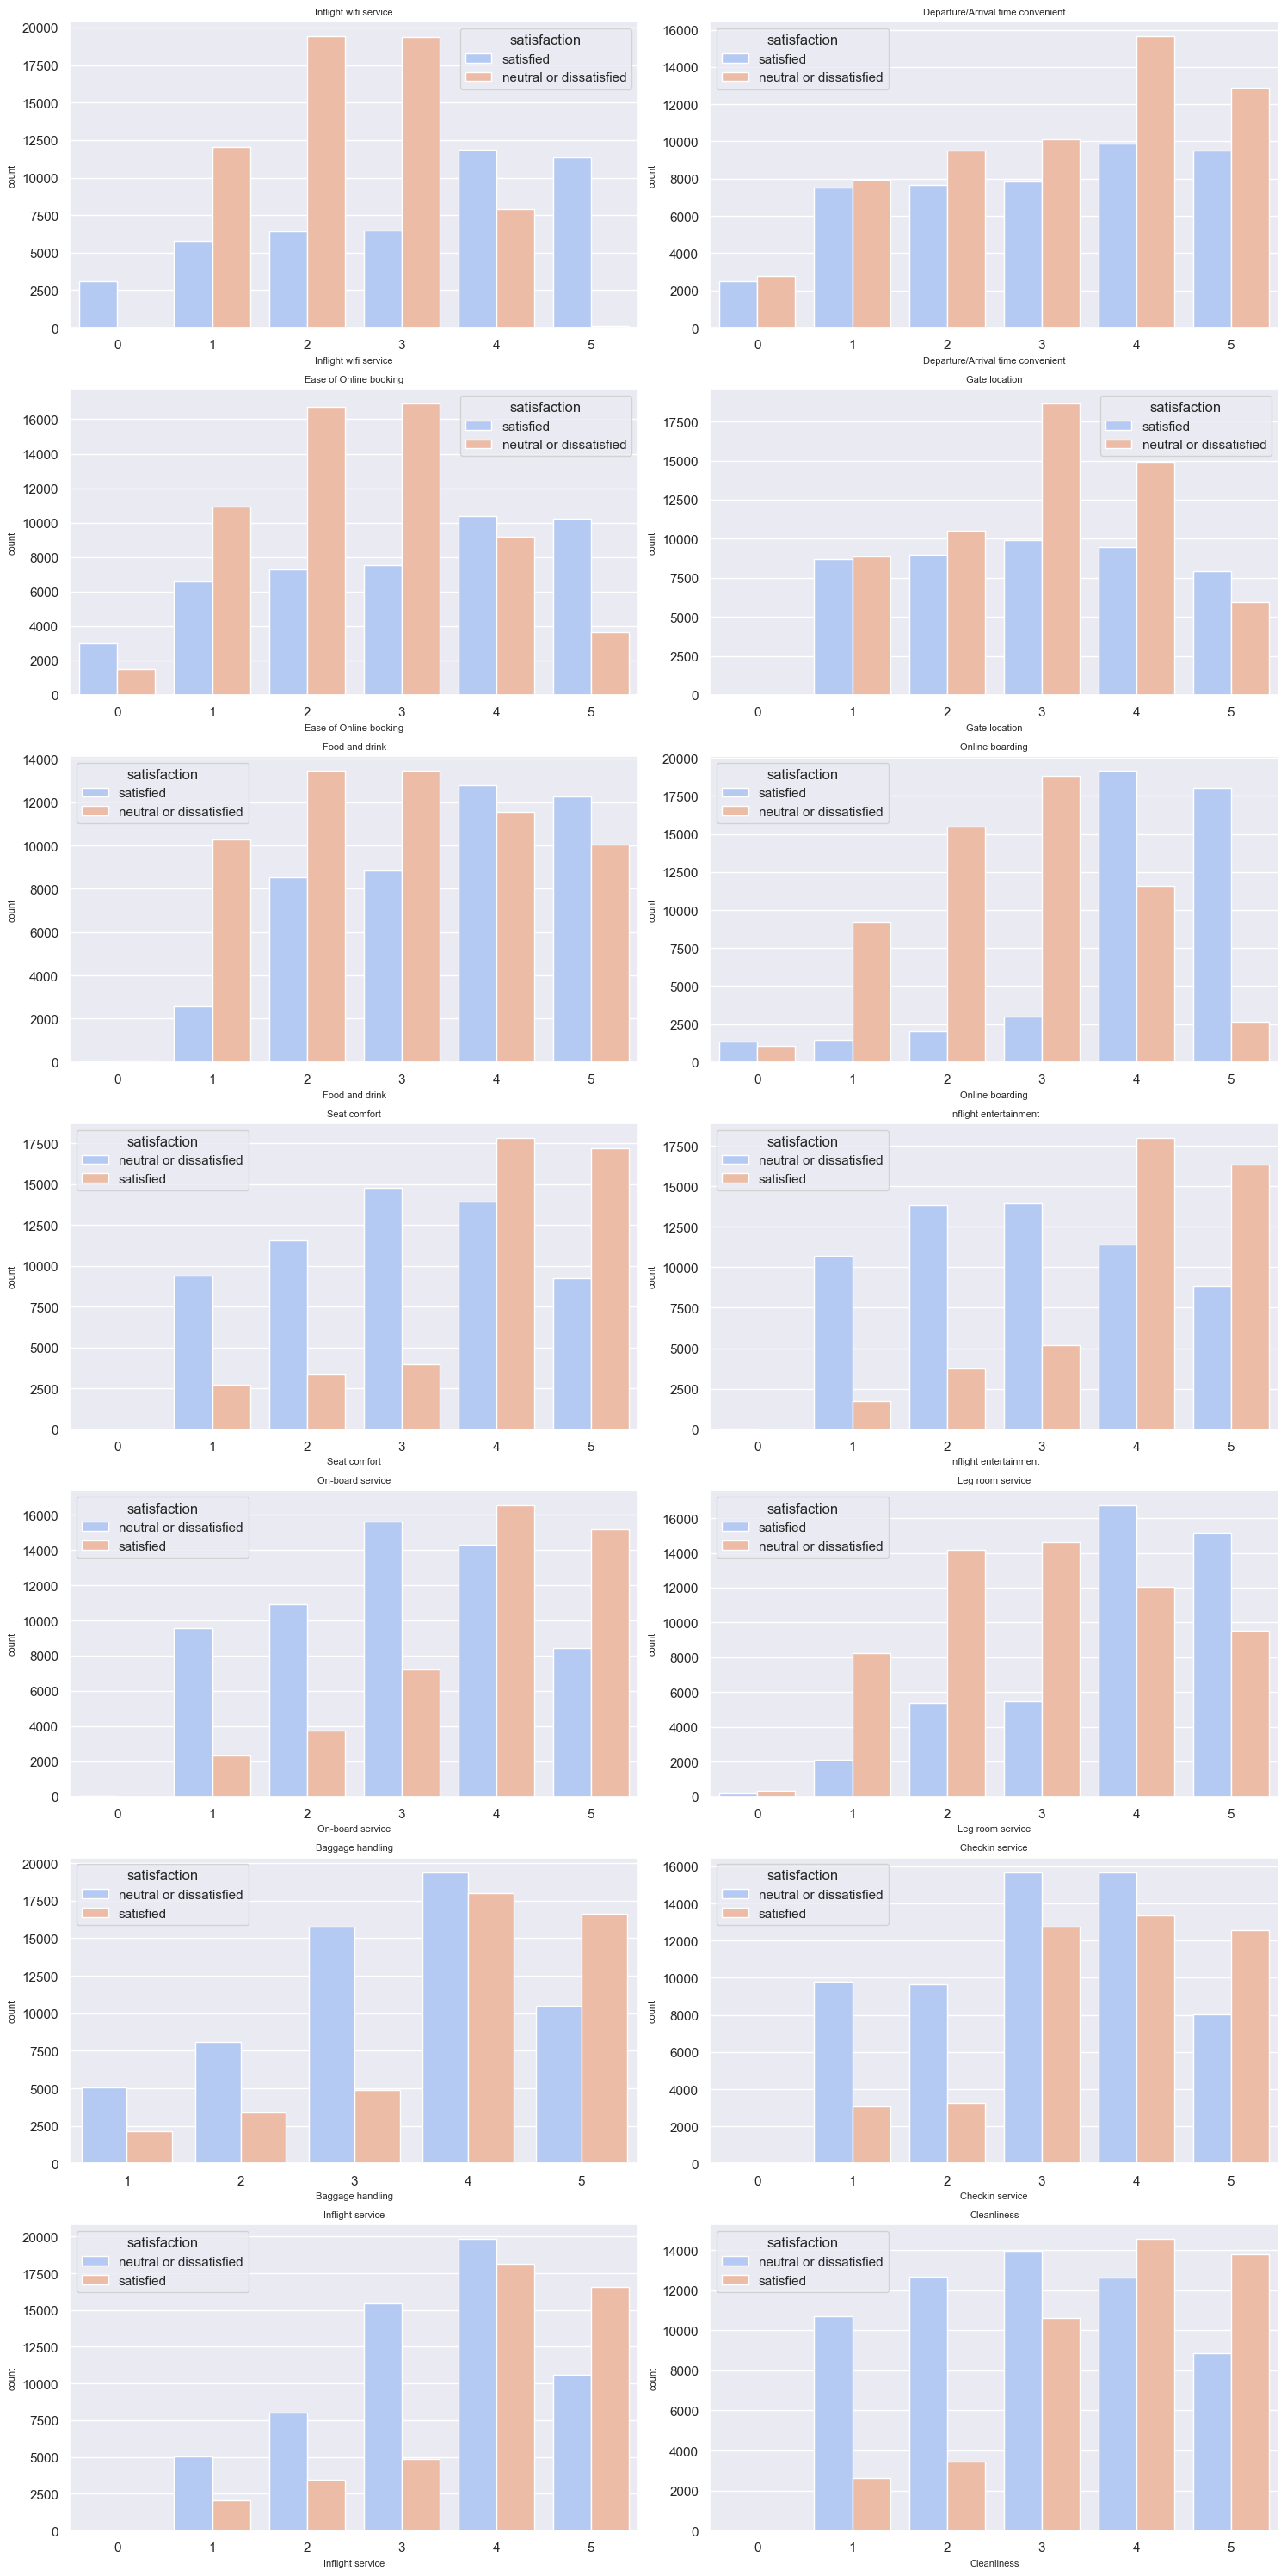

In [58]:
plt.figure(figsize=(15,30))
for i in range(len(non_continues)):
    plt.subplot(7,2,i+1)
    plt.title(non_continues[i])
    sns.countplot(x=df[non_continues[i]],hue=df['satisfaction'], palette = 'coolwarm')    
plt.tight_layout()
plt.show()

<Figure size 400x300 with 0 Axes>

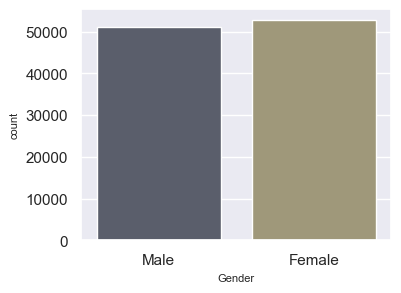

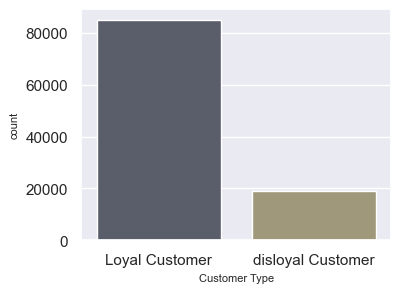

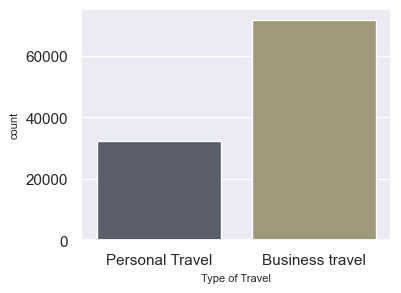

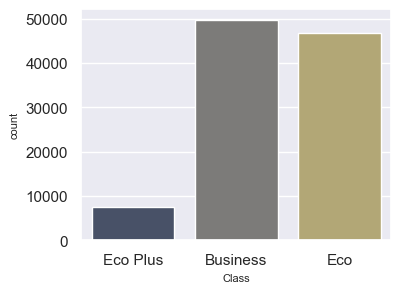

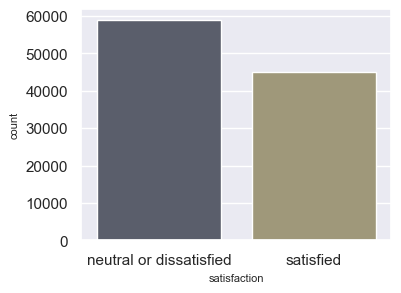

In [62]:
#using the countplot for the categorical columns
for col in categorical:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = col, data = df, palette = "cividis")
    plt.show();

<Figure size 800x600 with 0 Axes>

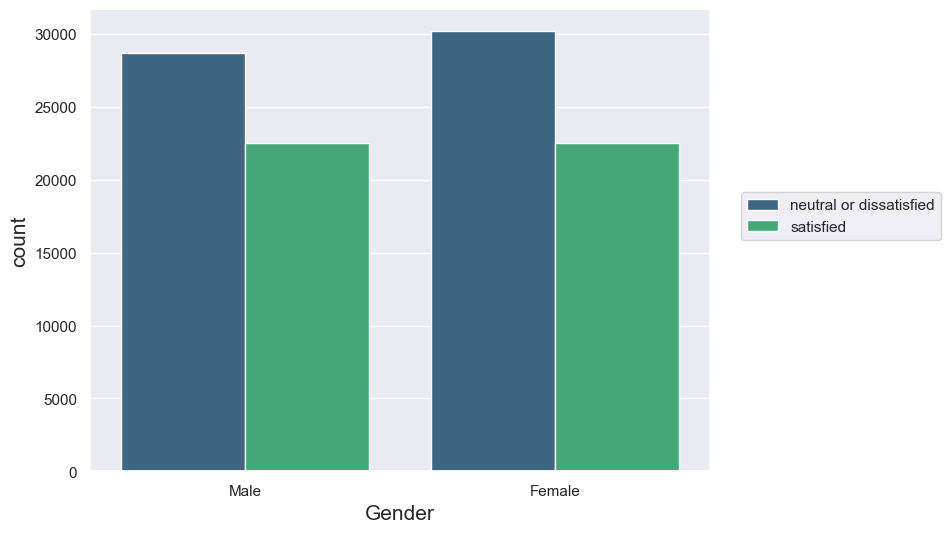

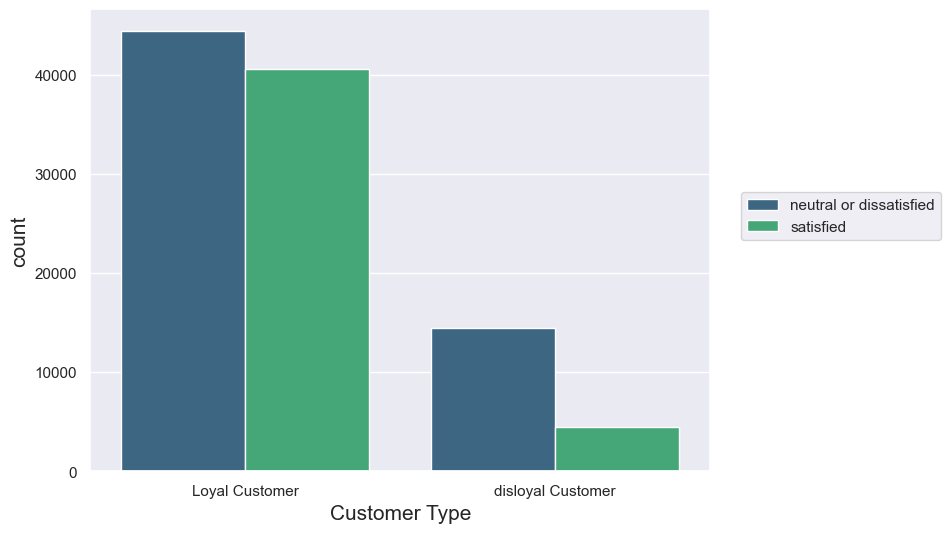

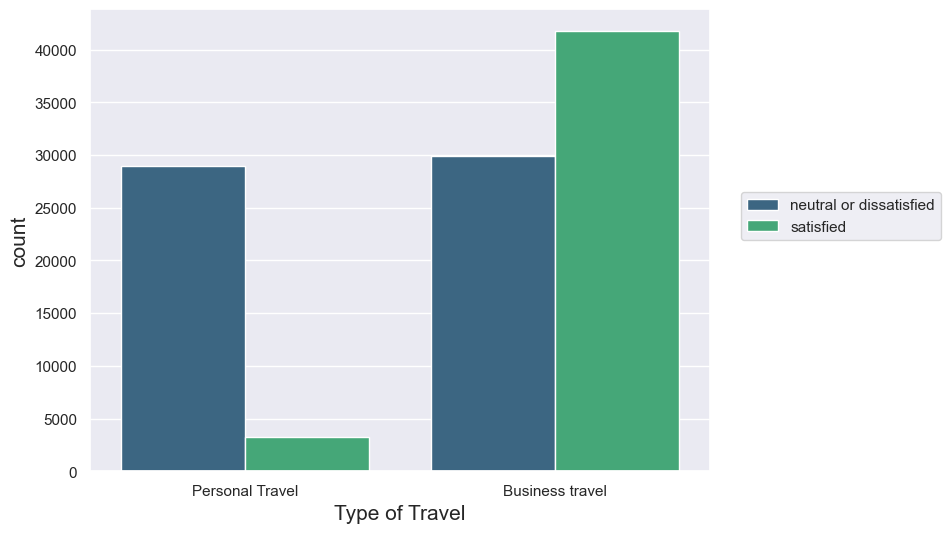

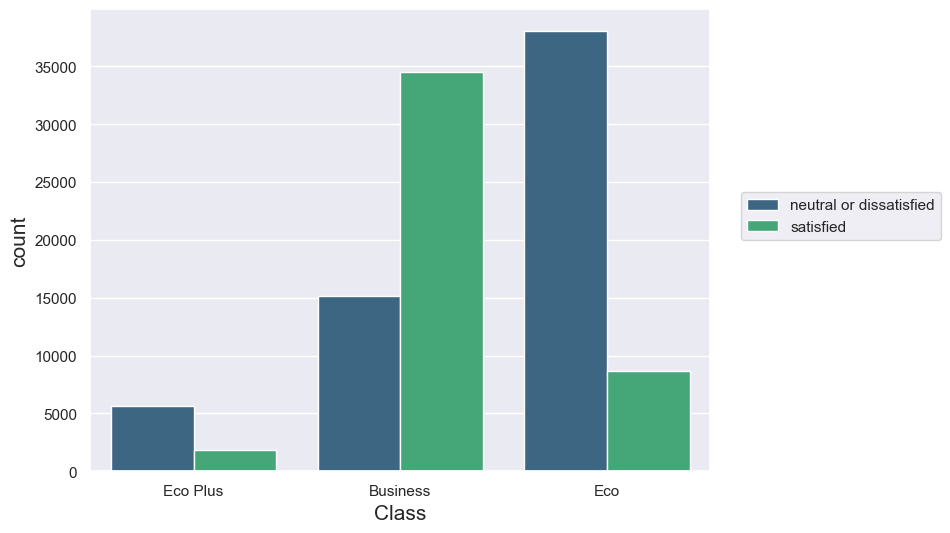

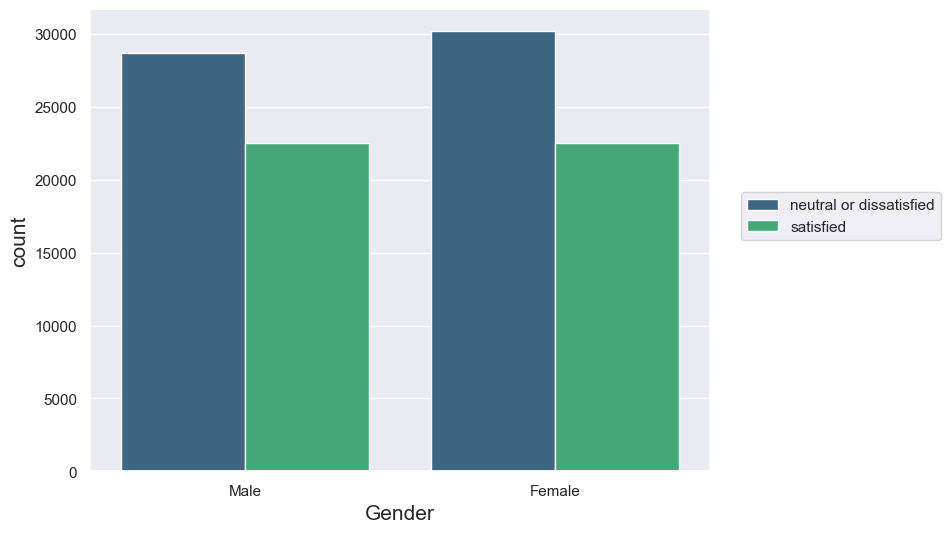

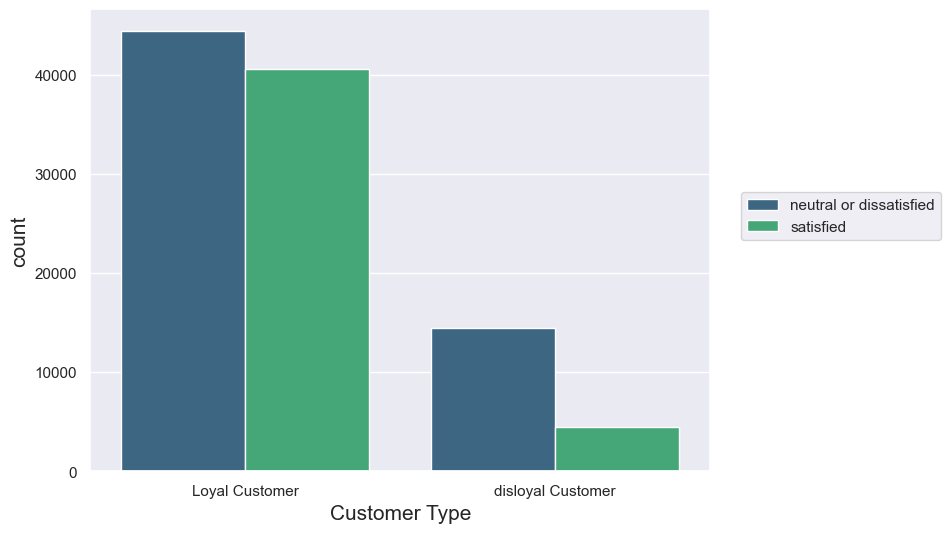

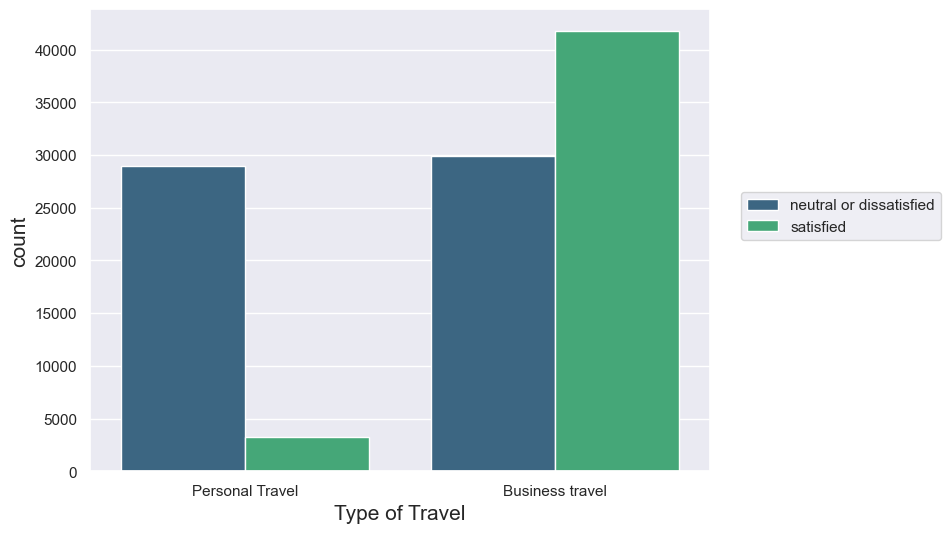

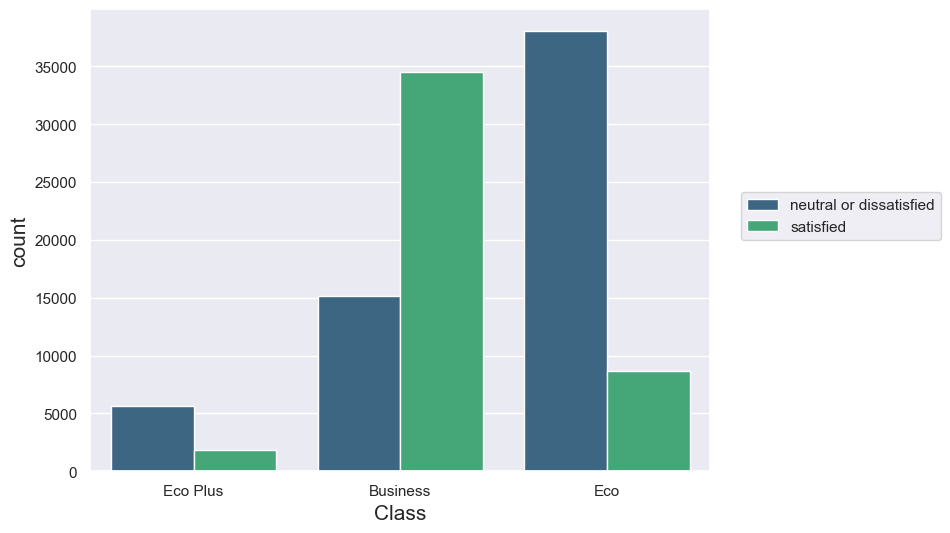

In [68]:
sns.set(rc={'figure.figsize':(8, 8),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical[:-1]:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(data=df, x=col, hue ='satisfaction', palette='viridis')
    plt.legend(loc=(1.05, 0.5))
plt.show()

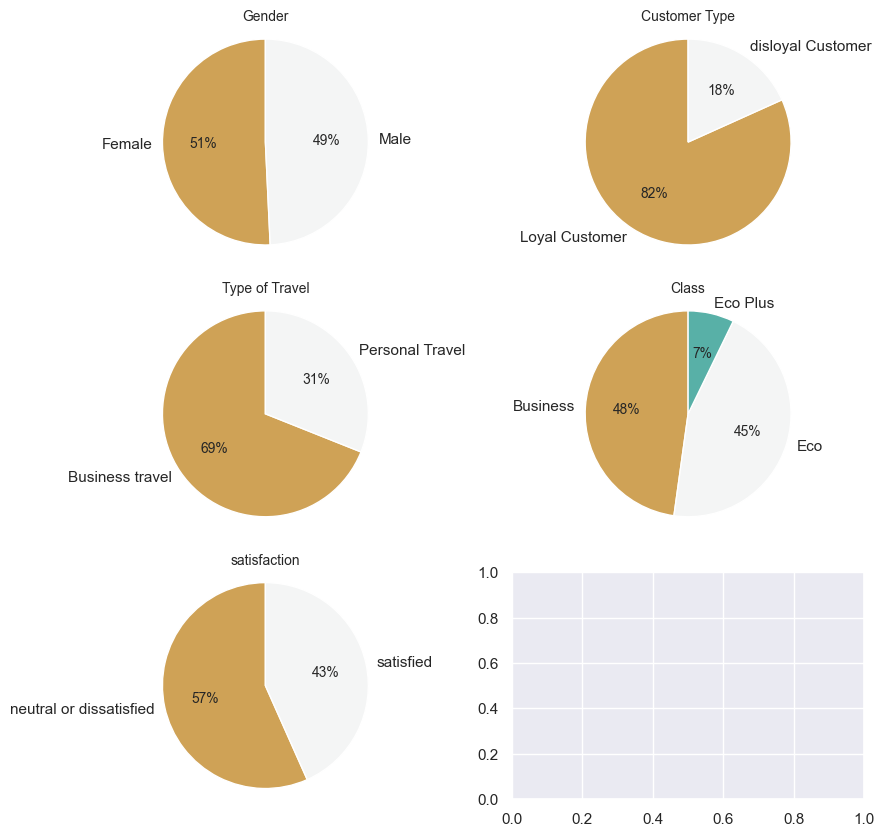

In [74]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
for i, col in enumerate(categorical):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("BrBG", 3),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

## EDA Question

1. What is the level of airline passenger satisfaction based on Departure Delay and Arrival Delay?
2. What is the level of airline passenger satisfaction when viewed based on Flight Distance and Departure Delay?
3. What is the demographics of airline passengers in terms of age and type of trips taken by passengers?
4. What is the demographics of airline passengers when viewed based on age and class used by passengers when using the airline?
5. What is the level of airline passenger satisfaction when viewed based on Flight Distance?

### 1. Departure Delay & Arrival Delay:

In [83]:
#level of satisfaction based on arrival and departure delay
df.groupby('satisfaction')['Departure Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    16.503728
satisfied                  12.608084
Name: Departure Delay in Minutes, dtype: float64

In [85]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    17.074594
satisfied                  12.594892
Name: Arrival Delay in Minutes, dtype: float64

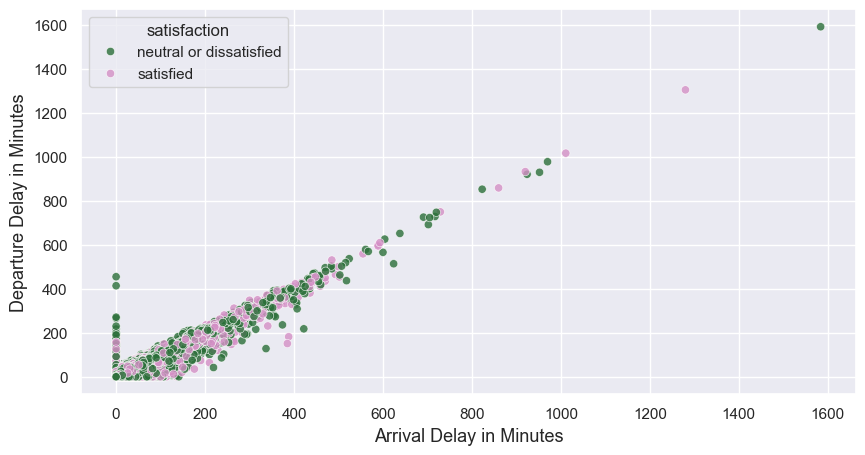

In [93]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', palette='cubehelix', alpha=0.8);
plt.show()

### 2. Flight Distance & Departure Delay:

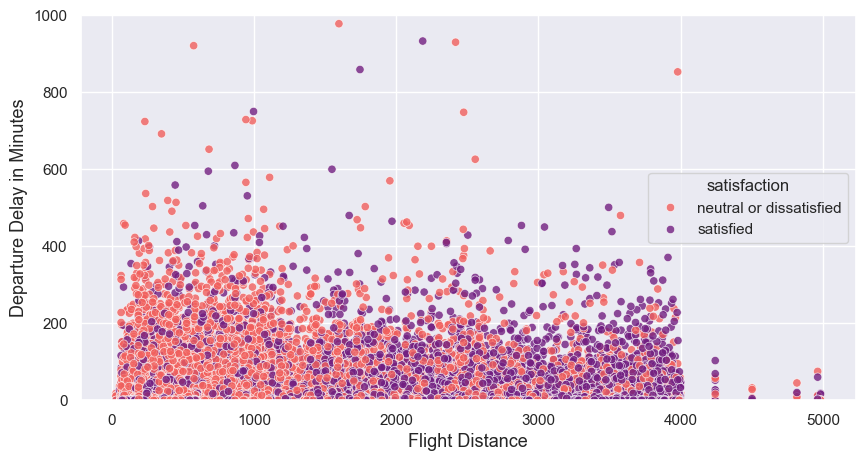

In [102]:
#satisfaction level based on departure delay and flight distance
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', palette='magma_r', alpha=0.8)
plt.ylim(0,1000);
plt.show()

### 3. Age & Customer Type:

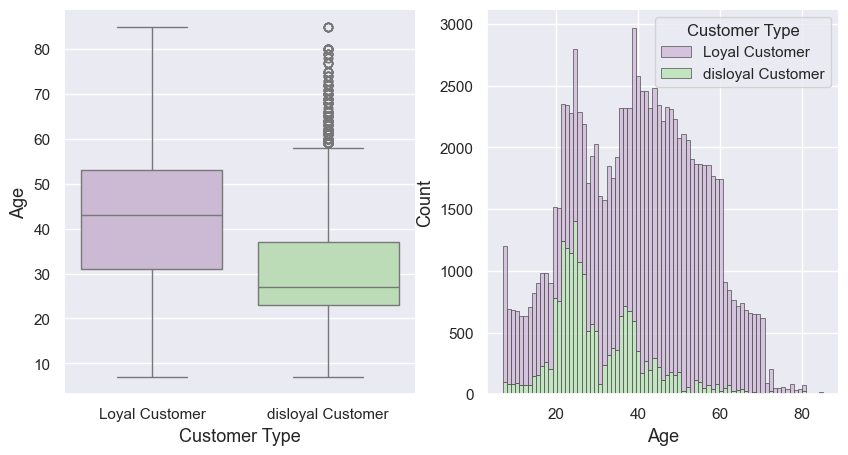

In [113]:
#demographic of passengers based on age and customer type
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "PRGn", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "PRGn", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);
plt.show()

### 4. Age & Class:

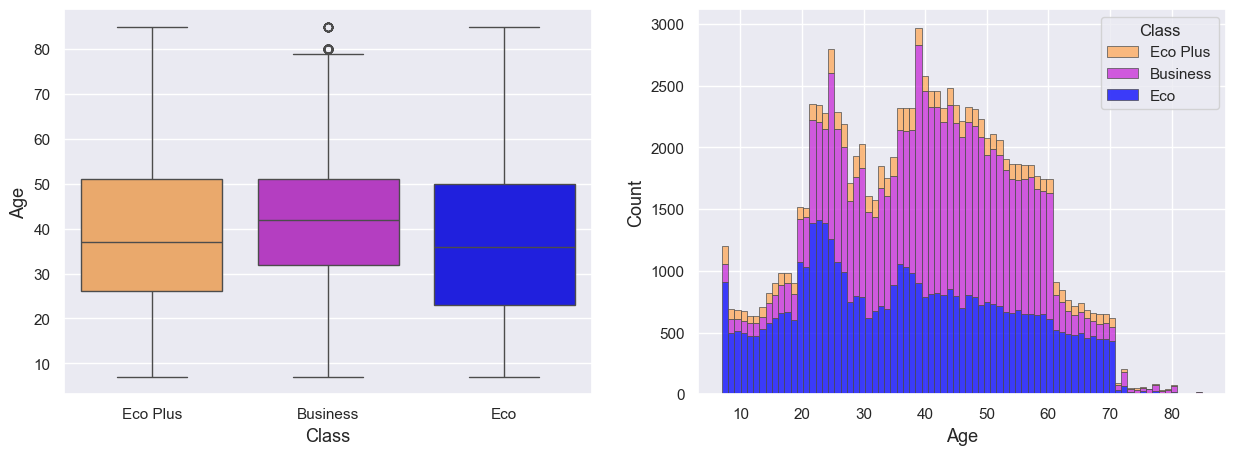

In [123]:
#demographic based on age and class
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);
plt.show()

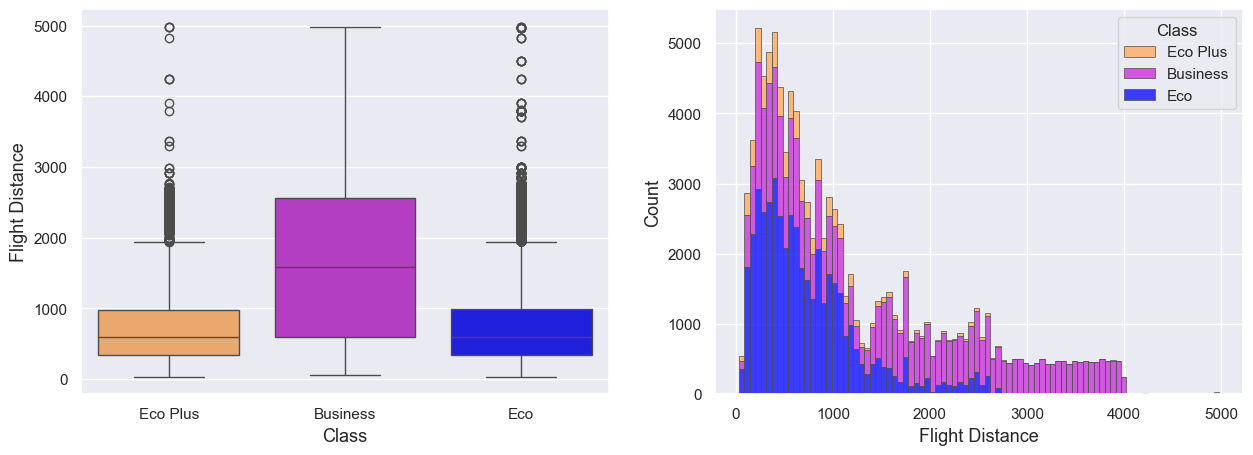

In [131]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);
plt.show()

### 5. Flight Distance

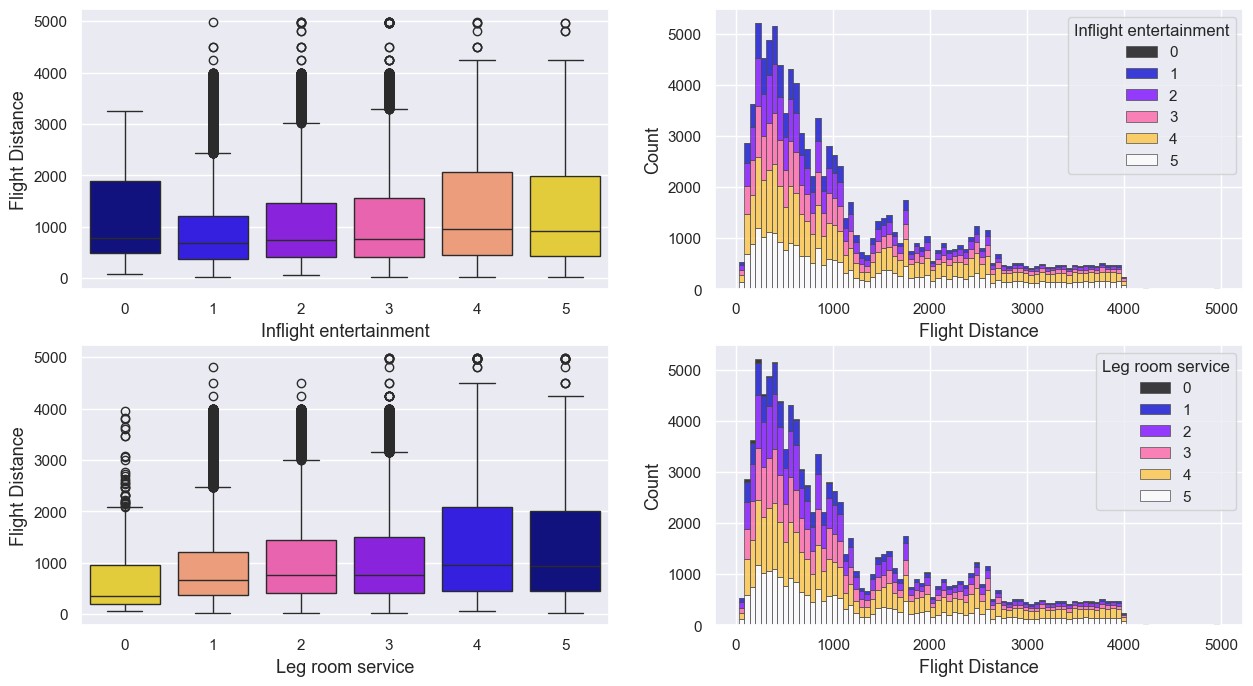

In [140]:
#level of satisfaction based on just the flight distance
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[1, 1]);
plt.show()

# Multivariate Analysis

## Using Pearson's Correlation for Drawing Heatmap:

### Correlation Heatmap for Numeric Column

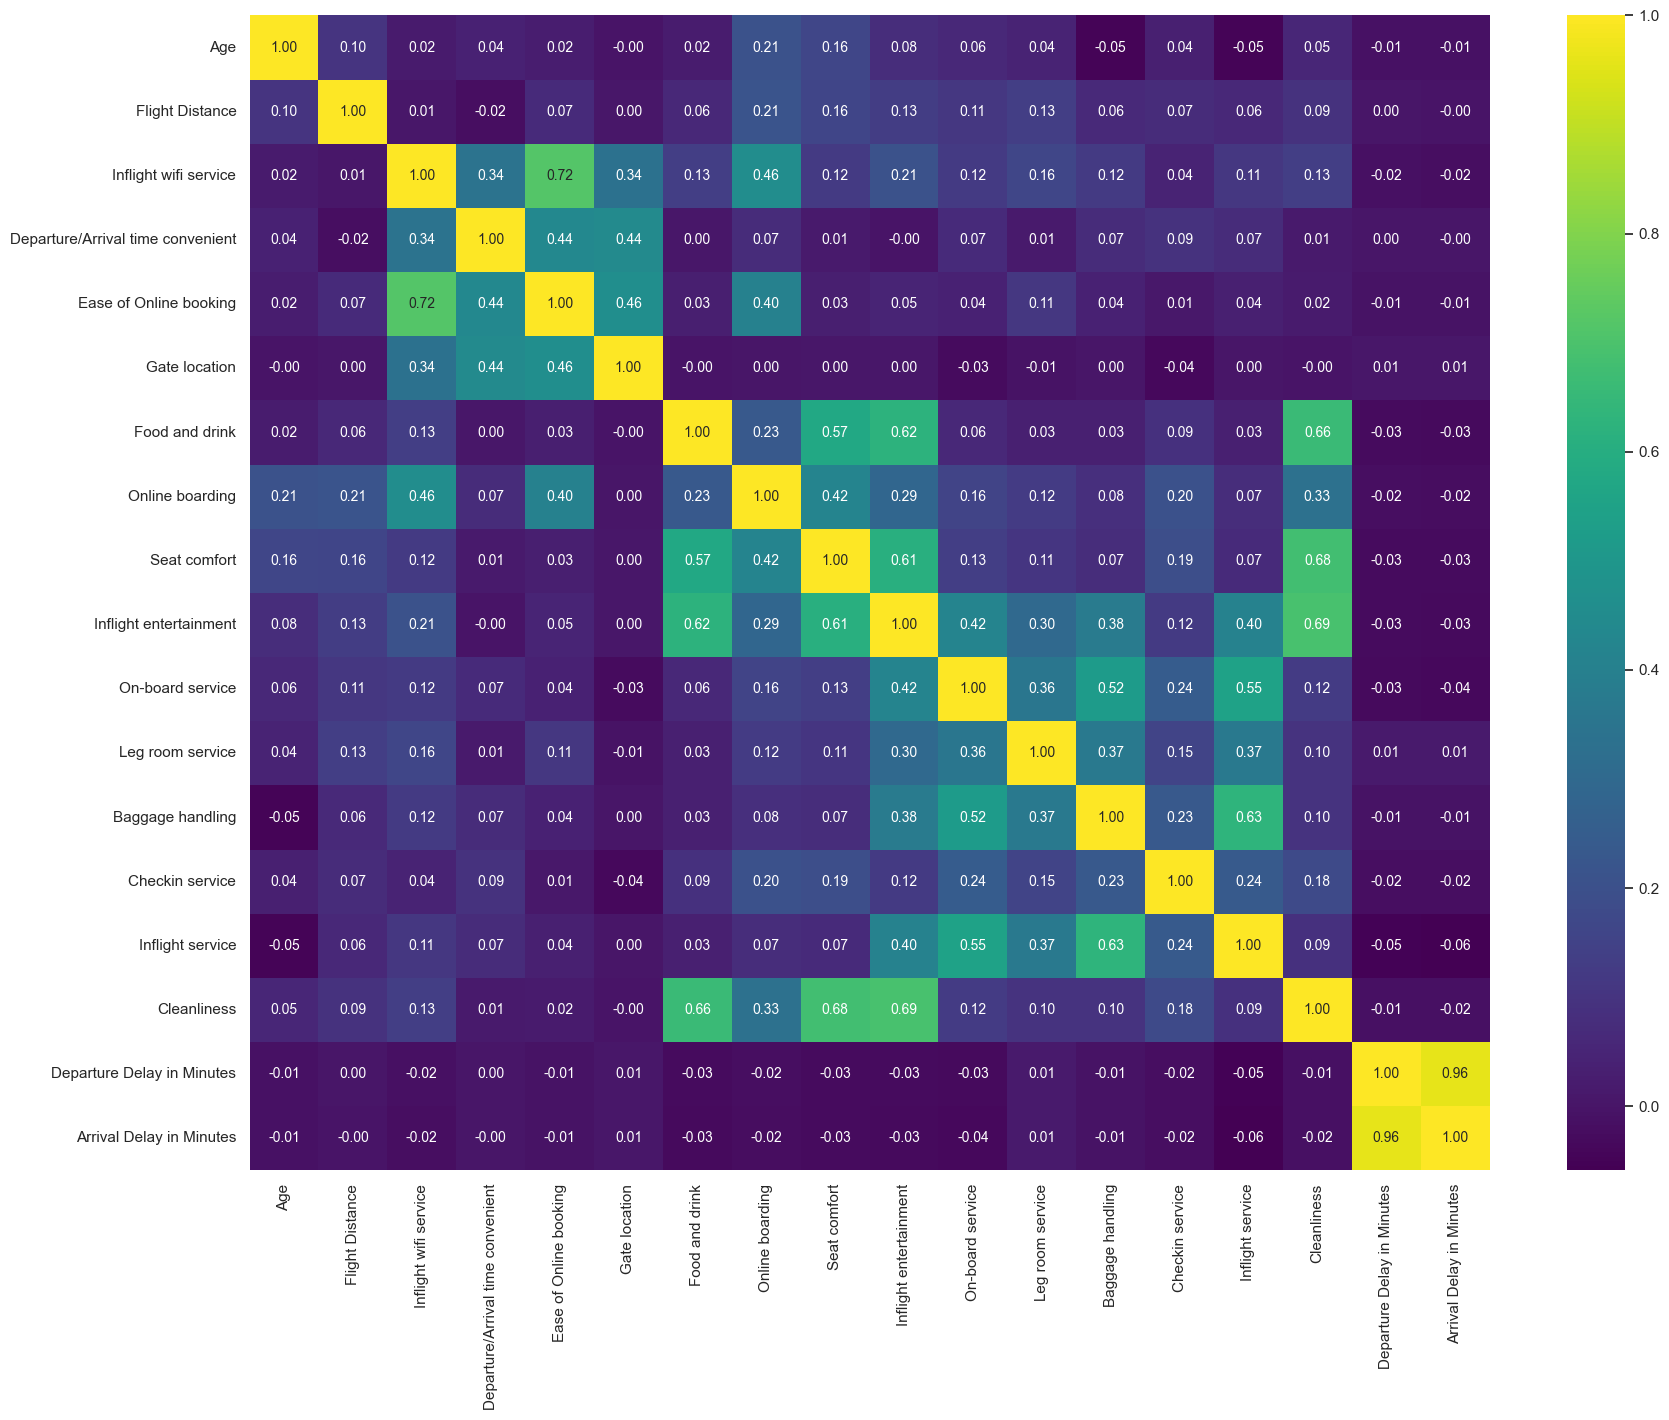

In [151]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize = (20, 15))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'viridis');
plt.show()

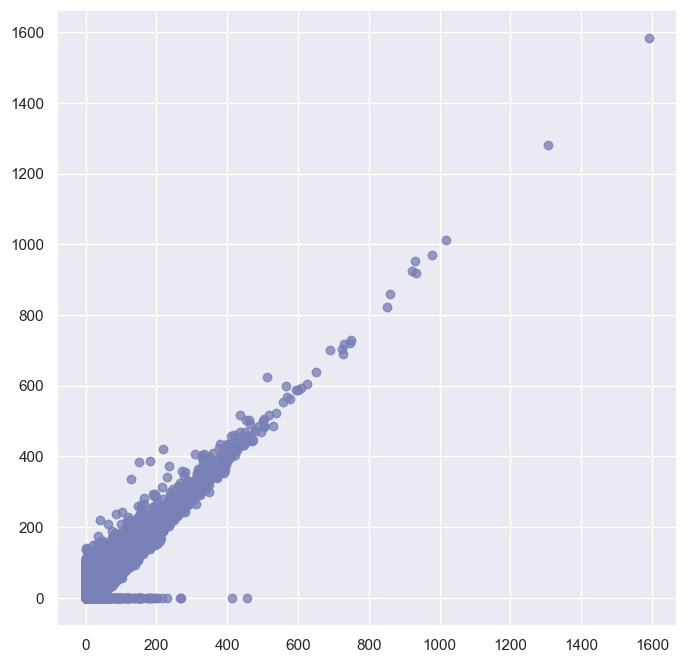

In [155]:
plt.scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], alpha = 0.5, color = '#7880b5')
pass;
plt.show()

### Dependent Variable or Feature:

In [158]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

### Check Dependent Variable is Balanced or Not:

In [161]:
round(df["satisfaction"].value_counts()[1]/(df["satisfaction"].value_counts()[0]+df["satisfaction"].value_counts()[1])*100,2)

43.33

### EDA on Feature Satisfaction:

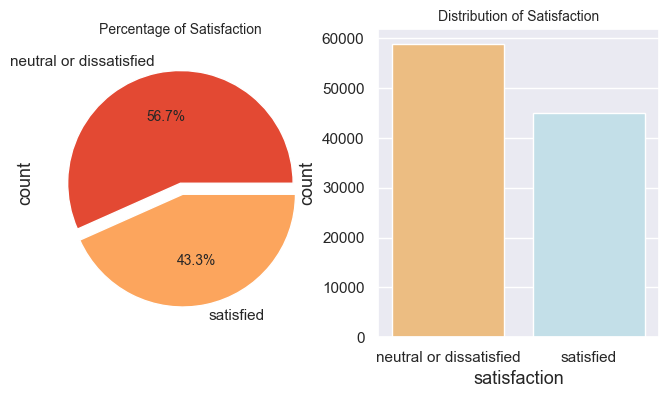

In [167]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
df['satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Satisfaction')
sns.countplot(x='satisfaction',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Satisfaction')
plt.show();